# Main - questions techniques

`xarray` doc: https://tutorial.xarray.dev/intro.html

Différence entre structures:
`xarray.DataArray`, `xarray.Dataset`,  `DataFrame`, `List`

lire : https://www.reddit.com/r/AskProgramming/comments/q5bjsi/what_are_the_differences_between_python_array/?tl=fr

## Imports des données

In [1]:
!pip install -r requirements/requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import xarray as xr
import pandas as pd
from pathlib import Path
from datetime import datetime

%reload_ext autoreload
%autoreload 2

In [3]:
DATA_PATH = Path("data")
RASTER_PATH = DATA_PATH / "rasters"
CSV_PATH = DATA_PATH / "csv"

In [4]:
raster_path = RASTER_PATH / "raster_test.nc"

## Selection de données dans arrays

### arrays

In [5]:
raster = xr.load_dataset(raster_path).drop("spatial_ref")

/tmp/ipykernel_24323/1131824223.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  raster = xr.load_dataset(raster_path).drop("spatial_ref")


In [6]:
raster

<xarray.Dataset> Size: 61kB
Dimensions:    (longitude: 5, latitude: 4, time: 365)
Coordinates:
  * longitude  (longitude) float64 40B 147.1 147.2 147.3 147.4 147.5
  * latitude   (latitude) float64 32B -42.34 -42.45 -42.55 -42.66
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
Data variables:
    max_temp   (time, latitude, longitude) float32 29kB 21.72 22.02 ... 24.88
    avg_temp   (time, latitude, longitude) float32 29kB 8.754 8.896 ... 9.204

Regarder une des variables, par exemple `max_temp` :

In [7]:
raster["max_temp"]

<xarray.DataArray 'max_temp' (time: 365, latitude: 4, longitude: 5)> Size: 29kB
array([[[21.723846, 22.02069 , 22.58197 , 22.58197 , 22.947021],
        [21.446747, 21.446747, 22.02069 , 22.355469, 22.68747 ],
        [20.954376, 21.446747, 21.84906 , 22.209167, 22.551025],
        [21.044403, 21.38977 , 21.946838, 22.214111, 22.200043]],

       [[16.736298, 16.722961, 16.862915, 16.862915, 17.534637],
        [16.308655, 16.308655, 16.722961, 16.632904, 16.997955],
        [15.847961, 16.308655, 16.628693, 16.681458, 17.066895],
        [16.705353, 17.042969, 17.556427, 19.21286 , 18.664246]],

       [[16.134949, 16.129303, 16.074463, 16.074463, 16.453552],
        [15.752319, 15.752319, 16.129303, 16.064606, 16.25592 ],
        [15.357727, 15.752319, 16.068817, 16.187683, 16.459198],
        [15.793091, 16.19754 , 16.703247, 18.015717, 17.67389 ]],

       ...,

       [[17.751251, 17.942566, 18.287933, 18.287933, 18.911102],
        [17.08728 , 17.08728 , 17.942566, 18.043854, 18.418762],
        [16.37619 , 17.08728 , 17.653503, 17.946106, 18.413116],
        [16.936066, 17.548004, 18.325195, 20.108246, 19.649658]],

       [[17.33136 , 17.696411, 18.419464, 18.419464, 18.840057],
        [16.732788, 16.732788, 17.696411, 17.948914, 18.234467],
        [15.992859, 16.732788, 17.39325 , 17.650696, 18.015717],
        [16.350159, 17.020477, 17.799805, 18.875244, 18.554504]],

       [[24.206726, 24.052002, 23.352844, 23.352844, 23.694672],
        [24.564056, 24.564056, 24.052002, 23.88388 , 23.983765],
        [24.23767 , 24.564056, 24.72229 , 24.669556, 24.564056],
        [25.204803, 25.503723, 25.952484, 26.91397 , 24.878448]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 40B 147.1 147.2 147.3 147.4 147.5
  * latitude   (latitude) float64 32B -42.34 -42.45 -42.55 -42.66
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  spatial_ref

On selectionne les valeurs par index, `longitude=0` veut dire, la première valeur de longitude.

In [8]:
raster["max_temp"][dict(longitude=0, latitude=0)]

<xarray.DataArray 'max_temp' (time: 365)> Size: 1kB
array([21.723846 , 16.736298 , 16.134949 , 21.890564 , 19.672852 ,
       15.453369 , 20.574554 , 27.85086  , 22.617828 , 25.209015 ,
       31.450684 , 28.589386 , 16.929749 , 19.31485  , 25.19638  ,
       22.463104 , 15.914093 , 13.77655  , 15.981598 , 18.697998 ,
       21.062714 , 26.291504 , 14.989868 , 22.802826 , 22.937164 ,
       19.421051 , 20.707489 , 24.69345  , 17.469208 , 24.545746 ,
       28.896759 , 18.415253 , 28.8609   , 24.730743 , 25.048645 ,
       18.58966  , 18.158508 , 21.311676 , 24.82077  , 28.04358  ,
       25.897614 , 21.831482 , 17.48117  , 14.672638 , 16.884033 ,
       21.899689 , 23.99643  , 21.082397 , 22.186676 , 24.926971 ,
       27.600464 , 21.187195 , 17.74002  , 16.775696 , 19.028564 ,
       24.478241 , 26.156464 , 15.266296 , 13.7034   , 15.799438 ,
       17.3609   , 23.94226  , 27.677826 , 24.507782 , 25.237152 ,
       25.55368  , 20.834808 , 15.811401 , 13.185028 , 17.771667 ,
       20.22287  , 20.710327 , 22.689575 , 24.725128 , 26.18811  ,
       25.453094 , 24.790527 , 19.61728  , 15.484314 , 12.399384 ,
       14.02063  , 16.367035 , 18.813354 , 24.619598 , 16.769379 ,
       13.905975 , 21.723846 , 15.513855 , 16.267883 , 17.76886  ,
       16.778503 , 11.582062 , 12.75528  , 16.626587 , 14.071259 ,
       17.332764 , 17.643646 , 16.789062 , 18.256287 , 18.70221  ,
...
        7.9892883,  6.932831 ,  9.129425 , 12.367035 , 15.335205 ,
       18.756378 , 17.64154  , 13.739288 , 17.512817 ,  9.580292 ,
       10.043823 , 11.982971 , 15.752319 , 17.321503 , 17.87857  ,
       10.657837 , 17.009216 ,  8.978912 ,  7.080536 , 10.238647 ,
        8.502045 , 12.421173 , 15.712921 , 20.261566 , 21.103485 ,
       12.312866 , 14.425049 , 16.377594 , 15.457611 , 15.86554  ,
       13.509277 , 19.051788 , 21.121094 , 17.609192 , 12.461975 ,
       13.323608 , 10.332886 , 10.318115 , 14.764069 , 16.695526 ,
       16.045624 , 16.911438 , 19.677765 , 19.016602 , 19.386597 ,
       24.626648 , 13.4895935, 11.357697 , 14.197876 , 14.591064 ,
       16.804535 , 11.487122 , 14.795746 , 16.44159  , 15.427368 ,
       23.284637 , 26.420929 , 20.284088 , 19.906372 , 18.588959 ,
       20.005554 , 13.937622 , 17.096436 , 16.454254 , 18.75003  ,
       20.041412 , 21.738617 , 21.188599 , 13.803284 , 16.319214 ,
       20.97055  , 22.339996 , 19.822662 , 12.61319  , 15.52652  ,
       13.264526 , 16.8573   , 21.749176 , 20.43039  , 16.600555 ,
       14.206329 , 14.865356 , 13.26944  , 16.206665 , 11.892242 ,
       18.240814 , 12.623047 , 21.609222 , 20.8721   , 12.198212 ,
       11.373169 , 18.456024 , 17.751251 , 17.33136  , 24.206726 ],
      dtype=float32)
Coordinates:
    longitude  float64 8B 147.1
    latitude   float64 8B -42.34
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  spatial_ref

Plot `time` à cette coordoonnée donc on repasse en 1D:

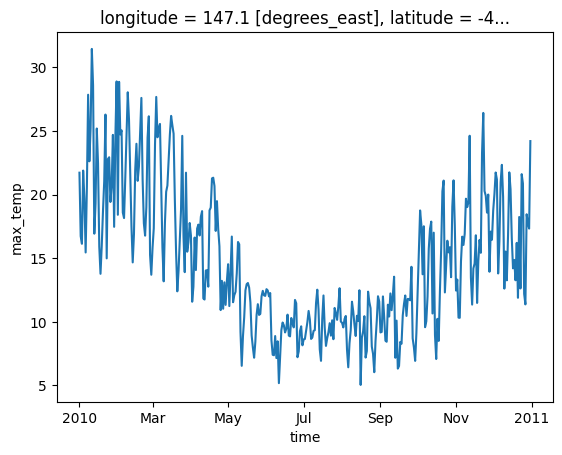

In [9]:
raster["max_temp"][dict(longitude=0, latitude=0)].plot()

Selectionner une valeur précise de l'array. On utilise `dict` .

In [10]:
raster["max_temp"][dict(longitude=0, latitude=0)].sel(dict(time=datetime(2010, 7, 1))).values

array(8.619507, dtype=float32)

Selectionner une valeur précise avec interpolation:

In [11]:
point_latitude = -42.5776
point_longitude = 147.3224
point_date = datetime(2010, 12, 5)

In [12]:
raster.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)

<xarray.Dataset> Size: 32B
Dimensions:    ()
Coordinates:
    longitude  float64 8B 147.3
    latitude   float64 8B -42.55
    time       datetime64[ns] 8B 2010-12-05
Data variables:
    max_temp   float32 4B 14.41
    avg_temp   float32 4B 4.911

In [13]:
point_avg_temp = raster.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)["avg_temp"].values
point_avg_temp

array(4.9108887, dtype=float32)

Selectionner une valeur de Data Variable particulière, ici `avg_temp` (+ d'info ici: https://tutorial.xarray.dev/intermediate/indexing/boolean-masking-indexing.html) : 

In [14]:
filtered = raster.avg_temp.where(raster.avg_temp == 9.061558, drop=True)
print(filtered)

<xarray.DataArray 'avg_temp' (time: 1, latitude: 1, longitude: 1)> Size: 4B
array([[[9.061558]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 8B 147.4
  * latitude   (latitude) float64 8B -42.66
  * time       (time) datetime64[ns] 8B 2010-01-01
Attributes:
    grid_mapping:  spatial_ref


### dataframe

Les coordonnées deviennent les index et les Data Variables deviennent les colonnes.

In [15]:
raster_df = raster.to_dataframe()
raster_df

max_temp  avg_temp
longitude  latitude   time                           
147.130082 -42.341808 2010-01-01  21.723846  8.753845
                      2010-01-02  16.736298  3.768144
                      2010-01-03  16.134949  5.911058
                      2010-01-04  21.890564  8.046718
                      2010-01-05  19.672852  5.626112
...                                     ...       ...
147.549550 -42.656409 2010-12-27  13.545166  0.332399
                      2010-12-28  18.154999  6.271446
                      2010-12-29  19.649658  4.356661
                      2010-12-30  18.554504  6.479784
                      2010-12-31  24.878448  9.203818

[7300 rows x 2 columns]

Pour que tous deviennent des attributs : `reset_index()`

In [16]:
rdf_reset = raster_df.reset_index()
rdf_reset

,longitude,latitude,time,max_temp,avg_temp
0,147.130082,-42.341808,2010-01-01,21.723846,8.753845
1,147.130082,-42.341808,2010-01-02,16.736298,3.768144
2,147.130082,-42.341808,2010-01-03,16.134949,5.911058
3,147.130082,-42.341808,2010-01-04,21.890564,8.046718
4,147.130082,-42.341808,2010-01-05,19.672852,5.626112
...,...,...,...,...,...
7295,147.549550,-42.656409,2010-12-27,13.545166,0.332399
7296,147.549550,-42.656409,2010-12-28,18.154999,6.271446
7297,147.549550,-42.656409,2010-12-29,19.649658,4.356661
7298,147.549550,-42.656409,2010-12-30,18.554504,6.479784


Regarder des variables :

In [17]:
rdf_time = rdf_reset["time"]
print(rdf_time)
rdf_max_temp = rdf_reset["max_temp"]
print(rdf_max_temp)

0      2010-01-01
1      2010-01-02
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
7295   2010-12-27
7296   2010-12-28
7297   2010-12-29
7298   2010-12-30
7299   2010-12-31
Name: time, Length: 7300, dtype: datetime64[ns]
0       21.723846
1       16.736298
2       16.134949
3       21.890564
4       19.672852
          ...    
7295    13.545166
7296    18.154999
7297    19.649658
7298    18.554504
7299    24.878448
Name: max_temp, Length: 7300, dtype: float32


Selectionner la ligne pour une certaine `time` (year, month, date) pour `time` dans les attributs:

In [18]:
rdf_reset[rdf_reset["time"] == datetime(2010,7,1)]

,longitude,latitude,time,max_temp,avg_temp
181,147.130082,-42.341808,2010-07-01,8.619507,0.382917
546,147.130082,-42.446675,2010-07-01,8.473206,0.374738
911,147.130082,-42.551542,2010-07-01,8.339569,0.320763
1276,147.130082,-42.656409,2010-07-01,8.861450,1.050083
1641,147.234949,-42.341808,2010-07-01,8.598389,0.350071
2006,147.234949,-42.446675,2010-07-01,8.473206,0.374738
2371,147.234949,-42.551542,2010-07-01,8.473206,0.374738
2736,147.234949,-42.656409,2010-07-01,8.971893,0.998784
3101,147.339816,-42.341808,2010-07-01,8.510468,0.268147
3466,147.339816,-42.446675,2010-07-01,8.598389,0.350071


Selectionner la ligne pour une certaine `time` (year, month, date) pour `time` dans les index: < TODO > parce que là c'est un multiindex donc on ne peut pas utiliser les méthodes classique type `loc`.

### % de "no" dans une colonne

Ajouter une colonne avec des yes et des no : 

In [19]:
rdf_reset.head(5)

,longitude,latitude,time,max_temp,avg_temp
0,147.130082,-42.341808,2010-01-01,21.723846,8.753845
1,147.130082,-42.341808,2010-01-02,16.736298,3.768144
2,147.130082,-42.341808,2010-01-03,16.134949,5.911058
3,147.130082,-42.341808,2010-01-04,21.890564,8.046718
4,147.130082,-42.341808,2010-01-05,19.672852,5.626112


In [20]:
rdf_reset["too hot"] = rdf_reset["avg_temp"] > 10
rdf_reset.head(5)

,longitude,latitude,time,max_temp,avg_temp,too hot
0,147.130082,-42.341808,2010-01-01,21.723846,8.753845,False
1,147.130082,-42.341808,2010-01-02,16.736298,3.768144,False
2,147.130082,-42.341808,2010-01-03,16.134949,5.911058,False
3,147.130082,-42.341808,2010-01-04,21.890564,8.046718,False
4,147.130082,-42.341808,2010-01-05,19.672852,5.626112,False


In [21]:
percentage_true = rdf_reset["too hot"].where(rdf_reset["too hot"]==True).sum() / len(rdf_reset) *100
percentage_true

11.602739726027398

### Taille d'une dataframe

In [22]:
rdf_reset.shape

(7300, 6)

In [23]:
len(rdf_reset)

7300

### Division de la dataframe

In [24]:
len_subdf = int(len(rdf_reset)/4)
sub_rdf_1 = rdf_reset[:len_subdf]
sub_rdf_2 = rdf_reset[len_subdf:2*len_subdf]
sub_rdf_3 = rdf_reset[2*len_subdf:3*len_subdf]
sub_rdf_4 = rdf_reset[3*len_subdf:]

In [25]:
sub_rdf_1.head(5)

,longitude,latitude,time,max_temp,avg_temp,too hot
0,147.130082,-42.341808,2010-01-01,21.723846,8.753845,False
1,147.130082,-42.341808,2010-01-02,16.736298,3.768144,False
2,147.130082,-42.341808,2010-01-03,16.134949,5.911058,False
3,147.130082,-42.341808,2010-01-04,21.890564,8.046718,False
4,147.130082,-42.341808,2010-01-05,19.672852,5.626112,False


In [26]:
sub_rdf_2.head(5)

,longitude,latitude,time,max_temp,avg_temp,too hot
1825,147.234949,-42.446675,2010-01-01,21.446747,8.739190,False
1826,147.234949,-42.446675,2010-01-02,16.308655,3.422783,False
1827,147.234949,-42.446675,2010-01-03,15.752319,5.848647,False
1828,147.234949,-42.446675,2010-01-04,21.081696,7.936157,False
1829,147.234949,-42.446675,2010-01-05,19.044037,5.343553,False


In [27]:
sub_rdf_3.head(5)

,longitude,latitude,time,max_temp,avg_temp,too hot
3650,147.339816,-42.551542,2010-01-01,21.849060,8.862279,False
3651,147.339816,-42.551542,2010-01-02,16.628693,3.536380,False
3652,147.339816,-42.551542,2010-01-03,16.068817,5.885389,False
3653,147.339816,-42.551542,2010-01-04,21.714722,8.222645,False
3654,147.339816,-42.551542,2010-01-05,19.563141,5.496068,False


In [28]:
sub_rdf_4.head(5)

,longitude,latitude,time,max_temp,avg_temp,too hot
5475,147.444683,-42.656409,2010-01-01,22.214111,9.061558,False
5476,147.444683,-42.656409,2010-01-02,19.212860,4.749695,False
5477,147.444683,-42.656409,2010-01-03,18.015717,6.934156,False
5478,147.444683,-42.656409,2010-01-04,23.417572,9.716511,False
5479,147.444683,-42.656409,2010-01-05,21.770294,6.701169,False


On va créer une nouvelle dataframe avec time en unique.

In [29]:
df_bilan = pd.DataFrame(columns=['time', 'avg_temp_mean', 'max_temp_mean', 'percentage_too_hot'])
df_bilan['time'] = pd.concat([sub_rdf_1['time'], sub_rdf_2['time'], sub_rdf_3['time'], sub_rdf_4['time']]).unique()
df_all = pd.concat([sub_rdf_1, sub_rdf_2, sub_rdf_3, sub_rdf_4])
df_bilan['avg_temp_mean'] = df_all.groupby(['time'], as_index=False).mean()["avg_temp"]
df_bilan['max_temp_mean'] = df_all.groupby(['time'], as_index=False).mean()["max_temp"]
df_bilan['percentage_too_hot'] = (df_all.groupby(['time'], as_index=False).sum()['too hot'])
df_agg = df_all.groupby(['time'], as_index=False).agg(nb_time=('too hot', 'size'), nb_too_hot=('too hot', 'sum'))
df_bilan["percentage_too_hot"] = (df_agg["nb_too_hot"] / df_agg["nb_time"]) * 100
too_hot_not_null = df_bilan["percentage_too_hot"][df_bilan["percentage_too_hot"]>0]
df_bilan

,time,avg_temp_mean,max_temp_mean,percentage_too_hot
0,2010-01-01,8.851185,21.980907,0.0
1,2010-01-02,3.636713,16.970318,0.0
2,2010-01-03,5.891319,16.251522,0.0
3,2010-01-04,8.285745,21.968281,0.0
4,2010-01-05,5.581903,19.937634,0.0
...,...,...,...,...
360,2010-12-27,0.077242,11.683141,0.0
361,2010-12-28,5.843984,18.212954,0.0
362,2010-12-29,4.385477,17.990194,0.0
363,2010-12-30,6.074201,17.621881,0.0


### Renommer des colonnes

In [30]:
df_bilan.rename(columns={"time":"date"}, inplace=True)
df_bilan.head(5)

,date,avg_temp_mean,max_temp_mean,percentage_too_hot
0,2010-01-01,8.851185,21.980907,0.0
1,2010-01-02,3.636713,16.970318,0.0
2,2010-01-03,5.891319,16.251522,0.0
3,2010-01-04,8.285745,21.968281,0.0
4,2010-01-05,5.581903,19.937634,0.0


### Supprimer des colonnes

In [31]:
df_bilan.drop(columns=["avg_temp_mean"], inplace=True)
df_bilan.head(5)

,date,max_temp_mean,percentage_too_hot
0,2010-01-01,21.980907,0.0
1,2010-01-02,16.970318,0.0
2,2010-01-03,16.251522,0.0
3,2010-01-04,21.968281,0.0
4,2010-01-05,19.937634,0.0


### Transformer date en nombre de jours

In [32]:
df_bilan.dtypes

date                  datetime64[ns]
max_temp_mean                float32
percentage_too_hot           float64
dtype: object

In [33]:
today=pd.Timestamp.today()
df_bilan['date'] = (today-df_bilan['date']).dt.days
df_bilan

,date,max_temp_mean,percentage_too_hot
0,5794,21.980907,0.0
1,5793,16.970318,0.0
2,5792,16.251522,0.0
3,5791,21.968281,0.0
4,5790,19.937634,0.0
...,...,...,...
360,5434,11.683141,0.0
361,5433,18.212954,0.0
362,5432,17.990194,0.0
363,5431,17.621881,0.0


### Remplacer valeurs manquantes

Je créé une colonne dans laquelle il y aura des valeurs manquantes.

In [34]:
import numpy as np

In [35]:
df_bilan["age_capteur"] = np.random.randint(0, 11, size=len(df_bilan))
df_bilan.head(5)

,date,max_temp_mean,percentage_too_hot,age_capteur
0,5794,21.980907,0.0,7
1,5793,16.970318,0.0,2
2,5792,16.251522,0.0,2
3,5791,21.968281,0.0,9
4,5790,19.937634,0.0,3


Remplacer les valeurs manquantes dans `age_capteur` par la moyenne arrondi à l'entier le plus proche.

In [36]:
moyenne_age_capteur = round(df_bilan["age_capteur"].mean())
df_bilan["age_capteur"].fillna(moyenne_age_capteur, inplace=True)
df_bilan

,date,max_temp_mean,percentage_too_hot,age_capteur
0,5794,21.980907,0.0,7
1,5793,16.970318,0.0,2
2,5792,16.251522,0.0,2
3,5791,21.968281,0.0,9
4,5790,19.937634,0.0,3
...,...,...,...,...
360,5434,11.683141,0.0,8
361,5433,18.212954,0.0,10
362,5432,17.990194,0.0,1
363,5431,17.621881,0.0,8


In [ ]:
### Convertir colonne en n